In [1]:
#install citipy #THANK IAN FOR LETTING ME KNOW ABOUT JUPYTER PIP INSTALL! SHOUTOUT! 
!pip install citipy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
#Observed trends using the randomly selected cities 
#1. Although no statiscal analyses were condcuted, there seems to be a curvilinear (inverted U) relationship between
#... Latitude and Temperature. As city latitude increases, so does temperature, but only to a point (it decreases
#... following a certain point)
#2. Based on the scatterplot (Latitude vs Cloudiness), no linear relationship was observed 
#3. Based on the scatterplot (Latitude vs Wind Speed), no linear relationship was observed 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
import time
from pprint import pprint 

#api
from key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [10]:
#test with one city
city_name = 'Atlanta'
base_url = (f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units=imperial{api_key}')

In [11]:
data_json = requests.get(base_url).json()
pprint(data_json)

#get lat, temnp, wind speed, humidity, cloudiness as test 
lat = data_json['coord']['lat']
temp = data_json['main']['temp']
humid = data_json['main']['humidity']
cloud = data_json['clouds']['all']

lat, temp, humid, cloud

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 33.75, 'lon': -84.39},
 'dt': 1538510160,
 'id': 4180439,
 'main': {'humidity': 47,
          'pressure': 1022,
          'temp': 83.62,
          'temp_max': 86,
          'temp_min': 82.04},
 'name': 'Atlanta',
 'sys': {'country': 'US',
         'id': 748,
         'message': 0.0038,
         'sunrise': 1538479999,
         'sunset': 1538522360,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 60, 'speed': 3.36}}


(33.75, 83.62, 47, 1)

In [7]:
#500 randomly selecteed cities based on lat and lon 
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1250)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1250)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

515

In [8]:
#convert cities list to a pd dataframe
data_pd= pd.DataFrame(cities)
data_pd['Latitude'] = ''
data_pd['Temperature'] = ''
data_pd['Wind Speed'] = ''
data_pd['Humidity'] = ''
data_pd['Cloudiness'] = ''
data_pd['Path'] = ''
data_pd = data_pd.rename(columns={0: 'Cities'})
data_pd.head()

,Cities,Latitude,Temperature,Wind Speed,Humidity,Cloudiness,Path
0,buraydah,,,,,,
1,vaini,,,,,,
2,bluff,,,,,,
3,mataura,,,,,,
4,buxton,,,,,,


In [9]:
data_pd.columns

Index(['Cities', 'Latitude', 'Temperature', 'Wind Speed', 'Humidity',
       'Cloudiness', 'Path'],
      dtype='object')

In [12]:
#get data
for index, i in data_pd.iterrows():
    param_city = i['Cities']
    url = (f'http://api.openweathermap.org/data/2.5/weather?q={param_city}&units=imperial{api_key}')
    response_json = requests.get(url).json()
    time.sleep(1.5)
    
    try:
        print(f"Processing {param_city} with url: {url}.")
        
         #just want to url to double check
        data_pd.loc[index, 'Path'] = url
    
        #saving data to dataframe
        data_pd.loc[index, 'Latitude'] = response_json['coord']['lat']
        data_pd.loc[index, 'Temperature'] = response_json['main']['temp']
        data_pd.loc[index, 'Humidity'] = response_json['main']['humidity']
        data_pd.loc[index, 'Cloudiness'] = response_json['clouds']['all']
        data_pd.loc[index, 'Wind Speed'] = response_json['wind']['speed']
        
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")
    
   



Processing buraydah with url: http://api.openweathermap.org/data/2.5/weather?q=buraydah&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing vaini with url: http://api.openweathermap.org/data/2.5/weather?q=vaini&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing bluff with url: http://api.openweathermap.org/data/2.5/weather?q=bluff&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing mataura with url: http://api.openweathermap.org/data/2.5/weather?q=mataura&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing buxton with url: http://api.openweathermap.org/data/2.5/weather?q=buxton&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing kaitangata with url: http://api.openweathermap.org/data/2.5/weather?q=kaitangata&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing ilulissat with url: http://api.openweathermap.org/data/2.5/weather?

Processing missoula with url: http://api.openweathermap.org/data/2.5/weather?q=missoula&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing mahebourg with url: http://api.openweathermap.org/data/2.5/weather?q=mahebourg&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing gao with url: http://api.openweathermap.org/data/2.5/weather?q=gao&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing namibe with url: http://api.openweathermap.org/data/2.5/weather?q=namibe&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing huntington with url: http://api.openweathermap.org/data/2.5/weather?q=huntington&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing torrox with url: http://api.openweathermap.org/data/2.5/weather?q=torrox&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing codrington with url: http://api.openweathermap.org/data/2.5/weath

Processing abnub with url: http://api.openweathermap.org/data/2.5/weather?q=abnub&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing bengkulu with url: http://api.openweathermap.org/data/2.5/weather?q=bengkulu&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
Missing field/result... skipping.
------------
Processing saint george with url: http://api.openweathermap.org/data/2.5/weather?q=saint george&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing golyshmanovo with url: http://api.openweathermap.org/data/2.5/weather?q=golyshmanovo&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing tuatapere with url: http://api.openweathermap.org/data/2.5/weather?q=tuatapere&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing ushuaia with url: http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing magadan w

Processing jamestown with url: http://api.openweathermap.org/data/2.5/weather?q=jamestown&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing yinchuan with url: http://api.openweathermap.org/data/2.5/weather?q=yinchuan&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing saskylakh with url: http://api.openweathermap.org/data/2.5/weather?q=saskylakh&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing evensk with url: http://api.openweathermap.org/data/2.5/weather?q=evensk&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing east london with url: http://api.openweathermap.org/data/2.5/weather?q=east london&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing sinnamary with url: http://api.openweathermap.org/data/2.5/weather?q=sinnamary&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing itarema with url: http://api.openweathermap.o

Processing sao filipe with url: http://api.openweathermap.org/data/2.5/weather?q=sao filipe&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing fairbanks with url: http://api.openweathermap.org/data/2.5/weather?q=fairbanks&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing puerto narino with url: http://api.openweathermap.org/data/2.5/weather?q=puerto narino&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing la grande with url: http://api.openweathermap.org/data/2.5/weather?q=la grande&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing kodiak with url: http://api.openweathermap.org/data/2.5/weather?q=kodiak&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing kutum with url: http://api.openweathermap.org/data/2.5/weather?q=kutum&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing maumere with url: http://api.openweathermap.o

Processing zhezkazgan with url: http://api.openweathermap.org/data/2.5/weather?q=zhezkazgan&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing hamilton with url: http://api.openweathermap.org/data/2.5/weather?q=hamilton&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing jinchang with url: http://api.openweathermap.org/data/2.5/weather?q=jinchang&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing lahaina with url: http://api.openweathermap.org/data/2.5/weather?q=lahaina&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing marsala with url: http://api.openweathermap.org/data/2.5/weather?q=marsala&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing kruisfontein with url: http://api.openweathermap.org/data/2.5/weather?q=kruisfontein&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing mezen with url: http://api.openweathermap.org

Processing mogadishu with url: http://api.openweathermap.org/data/2.5/weather?q=mogadishu&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing freetown with url: http://api.openweathermap.org/data/2.5/weather?q=freetown&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing karaman with url: http://api.openweathermap.org/data/2.5/weather?q=karaman&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
Missing field/result... skipping.
------------
Processing kangaatsiaq with url: http://api.openweathermap.org/data/2.5/weather?q=kangaatsiaq&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing seoul with url: http://api.openweathermap.org/data/2.5/weather?q=seoul&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing paamiut with url: http://api.openweathermap.org/data/2.5/weather?q=paamiut&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing waipawa with url: htt

Processing burr ridge with url: http://api.openweathermap.org/data/2.5/weather?q=burr ridge&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing balykshi with url: http://api.openweathermap.org/data/2.5/weather?q=balykshi&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
Missing field/result... skipping.
------------
Processing deputatskiy with url: http://api.openweathermap.org/data/2.5/weather?q=deputatskiy&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing kibala with url: http://api.openweathermap.org/data/2.5/weather?q=kibala&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing sidi ali with url: http://api.openweathermap.org/data/2.5/weather?q=sidi ali&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing cascais with url: http://api.openweathermap.org/data/2.5/weather?q=cascais&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing salalah with ur

Processing kinablangan with url: http://api.openweathermap.org/data/2.5/weather?q=kinablangan&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing sur with url: http://api.openweathermap.org/data/2.5/weather?q=sur&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing kuching with url: http://api.openweathermap.org/data/2.5/weather?q=kuching&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing kaupanger with url: http://api.openweathermap.org/data/2.5/weather?q=kaupanger&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing tsihombe with url: http://api.openweathermap.org/data/2.5/weather?q=tsihombe&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
Missing field/result... skipping.
------------
Processing otatitlan with url: http://api.openweathermap.org/data/2.5/weather?q=otatitlan&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing nowy sacz with url: h

Processing fort saint john with url: http://api.openweathermap.org/data/2.5/weather?q=fort saint john&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
Missing field/result... skipping.
------------
Processing blois with url: http://api.openweathermap.org/data/2.5/weather?q=blois&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing carballo with url: http://api.openweathermap.org/data/2.5/weather?q=carballo&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing sibu with url: http://api.openweathermap.org/data/2.5/weather?q=sibu&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing eureka with url: http://api.openweathermap.org/data/2.5/weather?q=eureka&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing duartina with url: http://api.openweathermap.org/data/2.5/weather?q=duartina&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing fort saint james with u

Processing xai-xai with url: http://api.openweathermap.org/data/2.5/weather?q=xai-xai&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------
Processing simbahan with url: http://api.openweathermap.org/data/2.5/weather?q=simbahan&units=imperial&APPID=018e7accdfc0e26af856ead8f136706e.
------------


In [47]:
data_pd = data_pd[['Cities', 'Latitude', 'Temperature', 'Wind Speed', 'Humidity',
       'Cloudiness', 'Path']]
data_pd['Latitude'] = pd.to_numeric(data_pd['Latitude'], errors='coerce')
data_pd['Temperature'] = pd.to_numeric(data_pd['Temperature'], errors='coerce')
data_pd['Wind Speed'] = pd.to_numeric(data_pd['Wind Speed'], errors='coerce')
data_pd['Humidity'] = pd.to_numeric(data_pd['Humidity'], errors='coerce')
data_pd['Cloudiness'] = pd.to_numeric(data_pd['Cloudiness'], errors='coerce')

data_pd.head()



,Cities,Latitude,Temperature,Wind Speed,Humidity,Cloudiness,Path
0,buraydah,26.33,87.80,4.70,23.0,0.0,http://api.openweathermap.org/data/2.5/weather...
1,vaini,15.34,71.22,1.61,100.0,76.0,http://api.openweathermap.org/data/2.5/weather...
2,bluff,-23.58,58.53,8.21,76.0,0.0,http://api.openweathermap.org/data/2.5/weather...
3,mataura,-46.19,44.67,4.29,89.0,0.0,http://api.openweathermap.org/data/2.5/weather...
4,buxton,53.26,53.60,4.70,81.0,36.0,http://api.openweathermap.org/data/2.5/weather...


Text(0.5,0,'City Latitude')

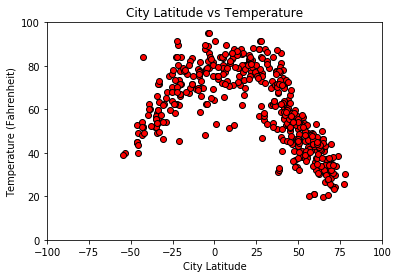

In [35]:
#Temperature (F) vs. Latitude Plot
plt.scatter(data_pd['Latitude'], data_pd['Temperature'], marker="o", facecolors="red", edgecolors="black")
plt.ylim(0,100)
plt.xlim(-100, 100)
plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("City Latitude")


Text(0.5,0,'City Latitude')

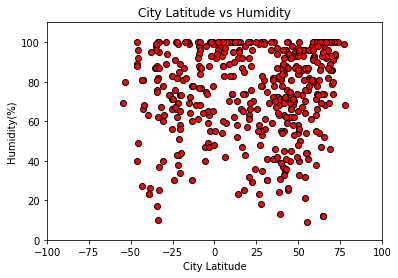

In [49]:
#Latitude vs Humidity
plt.scatter(data_pd['Latitude'], data_pd['Humidity'], marker="o", facecolors="red", edgecolors="black")
plt.ylim(0,110)
plt.xlim(-100, 100)
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("City Latitude")

Text(0.5,0,'City Latitude')

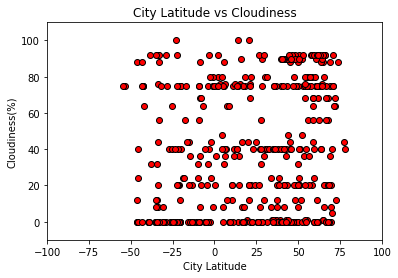

In [50]:
#Latitude vs Cloudiness
plt.scatter(data_pd['Latitude'], data_pd['Cloudiness'], marker="o", facecolors="red", edgecolors="black")
plt.ylim(-10,110)
plt.xlim(-100, 100)
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("City Latitude")

Text(0.5,0,'City Latitude')

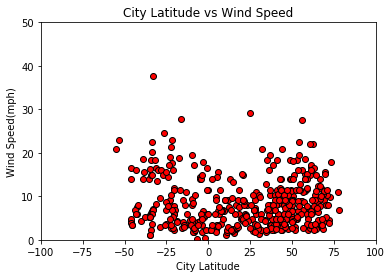

In [46]:
#Latitude vs Wind Speed
plt.scatter(data_pd['Latitude'], data_pd['Wind Speed'], marker="o", facecolors="red", edgecolors="black")
plt.ylim(0,50)
plt.xlim(-100, 100)
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("City Latitude")
